# Project :Consumer personal loan

# Table of Content

1.Introduction

2.Data wrangling process

 a.Data gathering

 b.Data Assessing

      i.Quality Issues

      ii.Tidiness Issues

 c.Data Cleaning
 
       i.drop unwanted columns

       ii.fill missing values

       iii.working on catagorical features
3.Model Selection

4.Conclusion

# 1-Introduction

Problem Statement: Prediction of Approval of Consumer Personal Loans Applications using different Machine Learning Algorithms.

Machine Learning Algorithms Used:

1.Logistic Regression

2.Random Forest Classifier

3.Support Vector Machine Classifier

4.Gradient Boosting Classfier

5.XGboost Classifier

In this project we will be predicting whether a person is given personal loan or not on the basis of historical data.

The real data is provided by Edulyt India under Internship program. We will follow the basic Machine Learning pipelines. As it is a classification problem so we will be applying various classification Machine Learning Algorithms mentioned above. We will choose the best model on the basis of accuracy score.

# 2. Data Wrangling Process

## Data Gathering

In [269]:
#required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#from xgboost import XGBClassifier
#import xgboost as xgb


In [270]:
#load data
df=pd.read_excel("Train.xlsx")

## Data accessing 

In [271]:
#top 5 rows of dataset
df.head()


,Loanapp_ID,Sex,Marital_Status,first_name,last_name,email,address,Dependents,Qual_var,SE,App_Income_1,App_Income_2,CPL_Amount,CPL_Term,Credit_His,Prop_Area,INT_ID,Prev_ID,AGT_ID,CPL_Status
0,CPL001002,M,N,Austin,Pennycook,apennycook1@mac.com,007 Miller Road,0,Grad,N,7018.8,0.0,NaN,360.0,1.0,Urban,9694176212,92-247-0058,Mozilla/5.0 (Windows; U; Windows NT 5.1; zh-TW...,Y
1,CPL001003,M,Y,Mareah,Tomanek,mtomanek2@bloomberg.com,145 Charing Cross Junction,1,Grad,N,5499.6,1809.6,153.6,360.0,1.0,Rural,152387684,36-236-3028,Mozilla/5.0 (Windows NT 5.1; rv:21.0) Gecko/20...,N
2,CPL001005,M,Y,Myrna,Rosenthaler,mrosenthaler3@dmoz.org,268 Algoma Hill,0,Grad,Y,3600.0,0.0,79.2,360.0,1.0,Urban,6510396556,34-339-0917,Mozilla/5.0 (Windows; U; Windows NT 6.1; cs-CZ...,Y
3,CPL001006,M,Y,Danyette,Stempe,dstempe4@tumblr.com,571 Stone Corner Park,0,Non Grad,N,3099.6,2829.6,144.0,360.0,1.0,Urban,7141853006,94-098-8902,Mozilla/5.0 (iPhone; U; CPU iPhone OS 4_2_1 li...,Y
4,CPL001008,M,N,Patten,McCathy,pmccathy5@ted.com,118 Moulton Drive,0,Grad,N,7200.0,0.0,169.2,360.0,1.0,Urban,23293411,38-247-1410,Mozilla/5.0 (Windows NT 6.0; WOW64) AppleWebKi...,Y


In [272]:
#bottom 5 rows of dataset 
df.tail()

,Loanapp_ID,Sex,Marital_Status,first_name,last_name,email,address,Dependents,Qual_var,SE,App_Income_1,App_Income_2,CPL_Amount,CPL_Term,Credit_His,Prop_Area,INT_ID,Prev_ID,AGT_ID,CPL_Status
609,CPL002978,F,N,Farlay,Stoakes,fstoakeso6@multiply.com,7 Dixon Point,0,Grad,N,3480.0,0.0,71.0,360.0,1.0,Rural,7970371132,71-281-1408,Mozilla/5.0 (Windows NT 6.1) AppleWebKit/535.8...,Y
610,CPL002979,M,Y,Nestor,Saben,nsabeno8@google.es,7590 Almo Crossing,3+,Grad,N,4927.2,0.0,40.0,180.0,1.0,Rural,5389023404,94-349-9755,Mozilla/5.0 (Windows NT 6.0; WOW64; rv:24.0) G...,Y
611,CPL002983,M,Y,Stanleigh,Le Fevre,slefevreo9@biblegateway.com,532 Hoepker Street,1,Grad,N,9686.4,288.0,253.0,360.0,1.0,Urban,5977024495,70-685-8094,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,Y
612,CPL002984,M,Y,Amalle,Whitmell,awhitmelloa@ftc.gov,6417 Gerald Alley,2,Grad,N,9099.6,0.0,187.0,360.0,1.0,Urban,3077859882,09-770-7899,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,Y
613,CPL002990,F,N,Gilly,Gauchier,ggauchierob@artisteer.com,37 Ruskin Crossing,0,Grad,Y,5499.6,0.0,133.0,360.0,0.0,Semi U,5248569311,58-618-0693,Mozilla/5.0 (Windows; U; Windows NT 5.1; ru-RU...,N


In [273]:
#general information and description of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 20 columns):
Loanapp_ID        614 non-null object
Sex               601 non-null object
Marital_Status    611 non-null object
first_name        614 non-null object
last_name         614 non-null object
email             614 non-null object
address           614 non-null object
Dependents        599 non-null object
Qual_var          614 non-null object
SE                582 non-null object
App_Income_1      614 non-null float64
App_Income_2      614 non-null float64
CPL_Amount        612 non-null float64
CPL_Term          600 non-null float64
Credit_His        564 non-null float64
Prop_Area         614 non-null object
INT_ID            614 non-null int64
Prev_ID           614 non-null object
AGT_ID            614 non-null object
CPL_Status        614 non-null object
dtypes: float64(5), int64(1), object(14)
memory usage: 96.1+ KB


In [274]:
#checking for no of null values in each column
df.isna().sum()

Loanapp_ID         0
Sex               13
Marital_Status     3
first_name         0
last_name          0
email              0
address            0
Dependents        15
Qual_var           0
SE                32
App_Income_1       0
App_Income_2       0
CPL_Amount         2
CPL_Term          14
Credit_His        50
Prop_Area          0
INT_ID             0
Prev_ID            0
AGT_ID             0
CPL_Status         0
dtype: int64

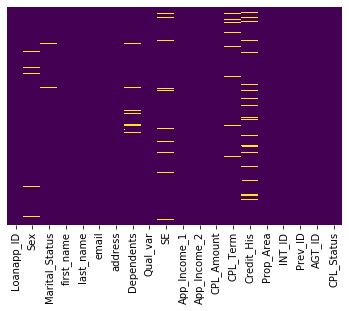

In [275]:
#ploting null values using heat map
sns.heatmap(df.isna(),yticklabels=False,cbar=False,cmap='viridis')

### Quality Issues:

1.Missing Values in Sex,Marital_Status,Credit_His,SE,Dependents,CPL_Amount,CPL_Term

2.Remove Unused Columns in Cleaning Process

### Tidiness issues:

1. Income columns should be combined as a single column 

# 3-Data cleaning

In [276]:
# adding new feature Total_income
df['Total_Income']=df['App_Income_1']+df['App_Income_2']

In [277]:
df.head()

,Loanapp_ID,Sex,Marital_Status,first_name,last_name,email,address,Dependents,Qual_var,SE,...,App_Income_2,CPL_Amount,CPL_Term,Credit_His,Prop_Area,INT_ID,Prev_ID,AGT_ID,CPL_Status,Total_Income
0,CPL001002,M,N,Austin,Pennycook,apennycook1@mac.com,007 Miller Road,0,Grad,N,...,0.0,NaN,360.0,1.0,Urban,9694176212,92-247-0058,Mozilla/5.0 (Windows; U; Windows NT 5.1; zh-TW...,Y,7018.8
1,CPL001003,M,Y,Mareah,Tomanek,mtomanek2@bloomberg.com,145 Charing Cross Junction,1,Grad,N,...,1809.6,153.6,360.0,1.0,Rural,152387684,36-236-3028,Mozilla/5.0 (Windows NT 5.1; rv:21.0) Gecko/20...,N,7309.2
2,CPL001005,M,Y,Myrna,Rosenthaler,mrosenthaler3@dmoz.org,268 Algoma Hill,0,Grad,Y,...,0.0,79.2,360.0,1.0,Urban,6510396556,34-339-0917,Mozilla/5.0 (Windows; U; Windows NT 6.1; cs-CZ...,Y,3600.0
3,CPL001006,M,Y,Danyette,Stempe,dstempe4@tumblr.com,571 Stone Corner Park,0,Non Grad,N,...,2829.6,144.0,360.0,1.0,Urban,7141853006,94-098-8902,Mozilla/5.0 (iPhone; U; CPU iPhone OS 4_2_1 li...,Y,5929.2
4,CPL001008,M,N,Patten,McCathy,pmccathy5@ted.com,118 Moulton Drive,0,Grad,N,...,0.0,169.2,360.0,1.0,Urban,23293411,38-247-1410,Mozilla/5.0 (Windows NT 6.0; WOW64) AppleWebKi...,Y,7200.0


In [278]:
#Making copy of original data
df_copy=df.copy()

In [279]:
#again checking top 5 rows of dataset
df_copy.head()


,Loanapp_ID,Sex,Marital_Status,first_name,last_name,email,address,Dependents,Qual_var,SE,...,App_Income_2,CPL_Amount,CPL_Term,Credit_His,Prop_Area,INT_ID,Prev_ID,AGT_ID,CPL_Status,Total_Income
0,CPL001002,M,N,Austin,Pennycook,apennycook1@mac.com,007 Miller Road,0,Grad,N,...,0.0,NaN,360.0,1.0,Urban,9694176212,92-247-0058,Mozilla/5.0 (Windows; U; Windows NT 5.1; zh-TW...,Y,7018.8
1,CPL001003,M,Y,Mareah,Tomanek,mtomanek2@bloomberg.com,145 Charing Cross Junction,1,Grad,N,...,1809.6,153.6,360.0,1.0,Rural,152387684,36-236-3028,Mozilla/5.0 (Windows NT 5.1; rv:21.0) Gecko/20...,N,7309.2
2,CPL001005,M,Y,Myrna,Rosenthaler,mrosenthaler3@dmoz.org,268 Algoma Hill,0,Grad,Y,...,0.0,79.2,360.0,1.0,Urban,6510396556,34-339-0917,Mozilla/5.0 (Windows; U; Windows NT 6.1; cs-CZ...,Y,3600.0
3,CPL001006,M,Y,Danyette,Stempe,dstempe4@tumblr.com,571 Stone Corner Park,0,Non Grad,N,...,2829.6,144.0,360.0,1.0,Urban,7141853006,94-098-8902,Mozilla/5.0 (iPhone; U; CPU iPhone OS 4_2_1 li...,Y,5929.2
4,CPL001008,M,N,Patten,McCathy,pmccathy5@ted.com,118 Moulton Drive,0,Grad,N,...,0.0,169.2,360.0,1.0,Urban,23293411,38-247-1410,Mozilla/5.0 (Windows NT 6.0; WOW64) AppleWebKi...,Y,7200.0


In [280]:
#droping the unwanted columns from the dataset
df_copy=df_copy.drop(columns=['Loanapp_ID','first_name','last_name','email','address','App_Income_1','App_Income_2','INT_ID','Prev_ID','AGT_ID'])

In [281]:
#information about dataset after performing above observation
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
Sex               601 non-null object
Marital_Status    611 non-null object
Dependents        599 non-null object
Qual_var          614 non-null object
SE                582 non-null object
CPL_Amount        612 non-null float64
CPL_Term          600 non-null float64
Credit_His        564 non-null float64
Prop_Area         614 non-null object
CPL_Status        614 non-null object
Total_Income      614 non-null float64
dtypes: float64(4), object(7)
memory usage: 52.9+ KB


In [282]:
df_copy.head(20)

,Sex,Marital_Status,Dependents,Qual_var,SE,CPL_Amount,CPL_Term,Credit_His,Prop_Area,CPL_Status,Total_Income
0,M,N,0,Grad,N,NaN,360.0,1.0,Urban,Y,7018.8
1,M,Y,1,Grad,N,153.6,360.0,1.0,Rural,N,7309.2
2,M,Y,0,Grad,Y,79.2,360.0,1.0,Urban,Y,3600.0
3,M,Y,0,Non Grad,N,144.0,360.0,1.0,Urban,Y,5929.2
4,M,N,0,Grad,N,169.2,360.0,1.0,Urban,Y,7200.0
5,M,Y,2,Grad,Y,320.4,360.0,1.0,Urban,Y,11535.6
6,M,Y,0,Non Grad,N,114.0,360.0,1.0,Urban,Y,4618.8
7,M,Y,3+,Grad,N,189.6,360.0,0.0,Semi U,N,6648.0
8,M,Y,2,Grad,N,201.6,360.0,1.0,Urban,Y,6638.4
9,M,Y,1,Grad,N,418.8,360.0,1.0,Semi U,N,28570.8


In [283]:
df_copy.tail(20)

,Sex,Marital_Status,Dependents,Qual_var,SE,CPL_Amount,CPL_Term,Credit_His,Prop_Area,CPL_Status,Total_Income
594,M,Y,0,Grad,Y,260.0,360.0,1.0,Urban,Y,19344.0
595,M,N,0,Non Grad,N,110.0,360.0,1.0,Rural,Y,4599.6
596,M,Y,2,Non Grad,Y,187.0,360.0,1.0,Rural,N,8859.6
597,M,N,NaN,Grad,N,88.0,360.0,0.0,Semi U,N,3584.4
598,M,Y,0,Grad,Y,180.0,360.0,1.0,Rural,Y,11955.6
599,M,Y,2,Grad,N,192.0,360.0,1.0,Urban,Y,6936.0
600,F,N,3+,Grad,NaN,350.0,180.0,NaN,Urban,N,50499.6
601,M,Y,0,Non Grad,NaN,155.0,360.0,1.0,Rural,Y,6823.2
602,M,Y,3+,Grad,N,128.0,360.0,1.0,Urban,Y,6843.6
603,M,N,0,Grad,N,172.0,360.0,1.0,Rural,Y,9572.4


## Missing values elemination 

In [284]:
df_copy.isna().sum()

Sex               13
Marital_Status     3
Dependents        15
Qual_var           0
SE                32
CPL_Amount         2
CPL_Term          14
Credit_His        50
Prop_Area          0
CPL_Status         0
Total_Income       0
dtype: int64

In [285]:
#filling missing values of credit history with help of prop_area and cpl_status 
def Credit(cols):
    Credit_His=cols[0]
    Prop_Area=cols[1]
    CPL_Status=cols[2]
    if pd.isna(Credit_His):
        if Prop_Area=='Semi U' and CPL_Status=='N':
            return 0
        elif Prop_Area=='Semi U' and CPL_Status=='Y':
            return 1
        elif Prop_Area=='Rural' and CPL_Status=='N':
            return 0
        elif Prop_Area=='Rural' and CPL_Status=='Y':
            return 1
        elif Prop_Area=='Urban' and CPL_Status=='N':
            return 0
        elif Prop_Area=='Urban' and CPL_Status=='Y':
            return 1
        
    else:
        return Credit_His
    
df_copy['Credit_His']=df_copy[['Credit_His','Prop_Area','CPL_Status']].apply(Credit,axis=1)

In [286]:
df_copy.isna().sum()

Sex               13
Marital_Status     3
Dependents        15
Qual_var           0
SE                32
CPL_Amount         2
CPL_Term          14
Credit_His         0
Prop_Area          0
CPL_Status         0
Total_Income       0
dtype: int64

In [287]:
#observing trend of self employed column by grouping it on basis of prop_area
df_copy.groupby(['SE','Prop_Area']).count()

Sex  Marital_Status  Dependents  Qual_var  CPL_Amount  CPL_Term  \
SE Prop_Area                                                                    
N  Rural      140             143         141       143         143       139   
   Semi U     187             189         186       191         191       189   
   Urban      164             165         160       166         164       161   
Y  Rural       25              26          26        26          26        26   
   Semi U      30              32          31        32          32        31   
   Urban       23              24          23        24          24        23   

              Credit_His  CPL_Status  Total_Income  
SE Prop_Area                                        
N  Rural             143         143           143  
   Semi U            191         191           191  
   Urban             166         166           166  
Y  Rural              26          26            26  
   Semi U             32          32            32  
   Urban              24          24            24

In [288]:
#filing missing value of SE column with help of prop_area
def Self_Employeed(cols):
    SE=cols[0]
    Prop_Area=cols[1]
    if pd.isna(SE):
        if Prop_Area=='Semi U':
            return 'Y'
        elif Prop_Area=='Rural':
            return 'Y'
        elif Prop_Area=='Urban':
            return 'N'
        
    else:
        return SE
    
df_copy['SE']=df_copy[['SE','Prop_Area']].apply(Self_Employeed,axis=1)

In [289]:
#observing trends in sex and dependents o basis of marital status 
df_copy.groupby(['Sex','Dependents']).count()['Marital_Status']

Sex  Dependents
F    0              80
     1              19
     2               7
     3+              3
M    0             258
     1              82
     2              92
     3+             45
Name: Marital_Status, dtype: int64

In [290]:
#filing dependents missing values with help of sex and marital status
def dependent(cols):
    Dependents=cols[0]
    Marital_Status=cols[1]
    Sex=cols[2]
    if pd.isna(Dependents):
        if Sex =='M' and Marital_Status =='N':
            return 0
        elif Sex =='M' and Marital_Status =='Y':
            return 2
        elif Sex =='F' and Marital_Status =='N':
            return 0
        elif Sex =='F' and Marital_Status =='Y':
            return 1
        
    else:
        return Dependents
    
df_copy['Dependents']=df_copy[['Dependents','Marital_Status','Sex']].apply(dependent,axis=1)

In [291]:
df_copy.isna().sum()

Sex               13
Marital_Status     3
Dependents         3
Qual_var           0
SE                 0
CPL_Amount         2
CPL_Term          14
Credit_His         0
Prop_Area          0
CPL_Status         0
Total_Income       0
dtype: int64

## filling other missing values by using backward fill and forward fill

In [292]:
df_copy['CPL_Term'].fillna(method='ffill',inplace=True)

In [293]:
df_copy['CPL_Amount'].fillna(method='bfill',inplace=True)

In [294]:
df_copy['Sex'].fillna(method='ffill',inplace=True)

In [295]:
df_copy['Marital_Status'].fillna(method='ffill',inplace=True)

In [296]:
df_copy.isna().sum()

Sex               0
Marital_Status    0
Dependents        3
Qual_var          0
SE                0
CPL_Amount        0
CPL_Term          0
Credit_His        0
Prop_Area         0
CPL_Status        0
Total_Income      0
dtype: int64

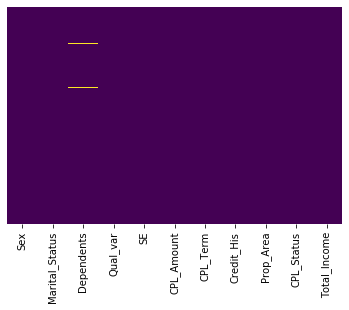

In [297]:
sns.heatmap(df_copy.isna(),yticklabels=False,cbar=False,cmap='viridis')

## Now looking for the catgorical features  in dataset

In [298]:
df_copy.head(20)

,Sex,Marital_Status,Dependents,Qual_var,SE,CPL_Amount,CPL_Term,Credit_His,Prop_Area,CPL_Status,Total_Income
0,M,N,0,Grad,N,153.6,360.0,1.0,Urban,Y,7018.8
1,M,Y,1,Grad,N,153.6,360.0,1.0,Rural,N,7309.2
2,M,Y,0,Grad,Y,79.2,360.0,1.0,Urban,Y,3600.0
3,M,Y,0,Non Grad,N,144.0,360.0,1.0,Urban,Y,5929.2
4,M,N,0,Grad,N,169.2,360.0,1.0,Urban,Y,7200.0
5,M,Y,2,Grad,Y,320.4,360.0,1.0,Urban,Y,11535.6
6,M,Y,0,Non Grad,N,114.0,360.0,1.0,Urban,Y,4618.8
7,M,Y,3+,Grad,N,189.6,360.0,0.0,Semi U,N,6648.0
8,M,Y,2,Grad,N,201.6,360.0,1.0,Urban,Y,6638.4
9,M,Y,1,Grad,N,418.8,360.0,1.0,Semi U,N,28570.8


In [299]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
Sex               614 non-null object
Marital_Status    614 non-null object
Dependents        611 non-null object
Qual_var          614 non-null object
SE                614 non-null object
CPL_Amount        614 non-null float64
CPL_Term          614 non-null float64
Credit_His        614 non-null float64
Prop_Area         614 non-null object
CPL_Status        614 non-null object
Total_Income      614 non-null float64
dtypes: float64(4), object(7)
memory usage: 52.9+ KB


## Removing catagorical features from data by get_dummies

In [300]:
sex=pd.get_dummies(df_copy.Sex,prefix='sex')

In [301]:
marital_status=pd.get_dummies(df_copy.Marital_Status,prefix='marital')

In [302]:
depend=pd.get_dummies(df_copy.Dependents,prefix='depend')

In [303]:
qualification=pd.get_dummies(df_copy.Qual_var)

In [304]:
se=pd.get_dummies(df_copy.SE,prefix='self_emp')

In [305]:
area=pd.get_dummies(df_copy.Prop_Area)

In [306]:
train=pd.concat([df_copy,sex,marital_status,qualification,se,area,depend],axis='columns')


In [307]:
train.head()

,Sex,Marital_Status,Dependents,Qual_var,SE,CPL_Amount,CPL_Term,Credit_His,Prop_Area,CPL_Status,...,Non Grad,self_emp_N,self_emp_Y,Rural,Semi U,Urban,depend_0,depend_1,depend_2,depend_3+
0,M,N,0,Grad,N,153.6,360.0,1.0,Urban,Y,...,0,1,0,0,0,1,1,0,0,0
1,M,Y,1,Grad,N,153.6,360.0,1.0,Rural,N,...,0,1,0,1,0,0,0,1,0,0
2,M,Y,0,Grad,Y,79.2,360.0,1.0,Urban,Y,...,0,0,1,0,0,1,1,0,0,0
3,M,Y,0,Non Grad,N,144.0,360.0,1.0,Urban,Y,...,1,1,0,0,0,1,1,0,0,0
4,M,N,0,Grad,N,169.2,360.0,1.0,Urban,Y,...,0,1,0,0,0,1,1,0,0,0


In [308]:
#droping all the catagorical columns after adding dummies catagorical features to them 
train=train.drop(columns=['Sex','Marital_Status','Qual_var','SE','Prop_Area','Dependents'])

In [309]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 20 columns):
CPL_Amount      614 non-null float64
CPL_Term        614 non-null float64
Credit_His      614 non-null float64
CPL_Status      614 non-null object
Total_Income    614 non-null float64
sex_F           614 non-null uint8
sex_M           614 non-null uint8
marital_N       614 non-null uint8
marital_Y       614 non-null uint8
Grad            614 non-null uint8
Non Grad        614 non-null uint8
self_emp_N      614 non-null uint8
self_emp_Y      614 non-null uint8
Rural           614 non-null uint8
Semi U          614 non-null uint8
Urban           614 non-null uint8
depend_0        614 non-null uint8
depend_1        614 non-null uint8
depend_2        614 non-null uint8
depend_3+       614 non-null uint8
dtypes: float64(4), object(1), uint8(15)
memory usage: 33.1+ KB


## Splitting data by using train test split of  sklearn by train data as 35% and test data as 65% and random state value as 3.

In [310]:
from sklearn.model_selection import train_test_split

In [311]:
x_train,x_test,y_train,y_test=train_test_split(train.drop('CPL_Status',axis=1),train['CPL_Status'],test_size=0.35,random_state=3)

# 4-MODEL SELECTION

# Applying logistic regression model of classification

In [312]:
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()


In [313]:
logmodel.fit(x_train,y_train)

C:\Users\Saurabh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [314]:
prediction=logmodel.predict(x_test)

In [315]:
#checking the confusion matrix 
from sklearn.metrics import confusion_matrix

In [316]:
accuracy=confusion_matrix(y_test,prediction)

In [317]:
accuracy

array([[ 32,  25],
       [  4, 154]], dtype=int64)

In [318]:
#checking accuraracy of model
from sklearn.metrics import accuracy_score

In [319]:
accuracy=accuracy_score(y_test,prediction)

In [320]:
accuracy

0.8651162790697674

### Cross Validation 

In [321]:
from sklearn.model_selection import cross_val_score

logmodel = LogisticRegression()
scores = cross_val_score(logmodel,train.drop('CPL_Status',axis=1),train['CPL_Status'] , cv=6)
accuracy_cross = np.mean(scores)
print(scores)
print(accuracy_cross)

[0.84466019 0.80582524 0.79411765 0.81372549 0.84313725 0.83333333]
0.8224665270638999


C:\Users\Saurabh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Saurabh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Saurabh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Saurabh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Saurabh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to

# Applying randomforest classifier by taking n_estimator value as 150

In [322]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 150)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [323]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[ 37  20]
 [ 16 142]]
Classification Report:
              precision    recall  f1-score   support

           N       0.70      0.65      0.67        57
           Y       0.88      0.90      0.89       158

    accuracy                           0.83       215
   macro avg       0.79      0.77      0.78       215
weighted avg       0.83      0.83      0.83       215

Accuracy: 0.8325581395348837


In [324]:
scores_rf = cross_val_score(classifier,train.drop('CPL_Status',axis=1),train['CPL_Status'] , cv=5)
accuracy_cross_rf = np.mean(scores_rf)
print(scores_rf)
print(accuracy_cross_rf)

[0.81451613 0.72580645 0.75409836 0.81967213 0.82786885]
0.7883923849814913


# Applying gradient boosting classifier

In [325]:
from sklearn.ensemble import GradientBoostingClassifier

In [326]:
gbc_model=GradientBoostingClassifier()

In [327]:
gbc_model.fit(x_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [328]:
y_pred=gbc_model.predict(x_test)

In [329]:
matrix=confusion_matrix(y_test,y_pred)

In [330]:
matrix

array([[ 35,  22],
       [ 14, 144]], dtype=int64)

In [331]:
score=accuracy_score(y_test,y_pred)

In [332]:
score

0.8325581395348837

In [333]:
scores_gbc = cross_val_score(gbc_model,train.drop('CPL_Status',axis=1),train['CPL_Status'] , cv=6)
accuracy_cross_gbc = np.mean(scores_gbc)
print(scores_gbc)
print(accuracy_cross_gbc)

[0.82524272 0.78640777 0.78431373 0.82352941 0.81372549 0.83333333]
0.811092074370201


# Applying support vector classifier

In [334]:
from sklearn.svm import SVC

In [335]:
svm_model=SVC()

In [336]:
svm_model.fit(x_train,y_train)

C:\Users\Saurabh\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [337]:
y_pred=svm_model.predict(x_test)

In [338]:
matrix=confusion_matrix(y_test,y_pred)

In [339]:
matrix

array([[  0,  57],
       [  0, 158]], dtype=int64)

In [340]:
score=accuracy_score(y_test,y_pred)
score

0.7348837209302326

In [341]:
svm=SVC()
scores_svm = cross_val_score(svm,train.drop('CPL_Status',axis=1),train['CPL_Status'] , cv=6)
accuracy_cross_svm = np.mean(scores_svm)
print(scores_svm)
print(accuracy_cross_svm)

C:\Users\Saurabh\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Saurabh\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Saurabh\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Saurabh\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: Fut

[0.68932039 0.68932039 0.68627451 0.68627451 0.68627451 0.68627451]
0.6872898026524527


# 5-Conclusion

Well, we applied four machine learning algorithms and out of those four Logistic Regrerssion and Gradient Boosting Classfier,and Random forest are giving accuracy score above 80 percent. Support Vector Machine is worst among them with 73 percent of accuracy score and 68 perceent of validation score. Random forest Gives 83 percent but during cross validation score it goes less than 80 percent.

We may choose either Logistic Regression or Gradient Boosting Classifier for Hyper Parameter Tunning.